##Задача №63.
1. Изобразите отношение households к population с помощью точечного графика
2. Визуализировать longitude по отношения к median_house_value, используя линейный график
3. Представить гистограмму по housing_median_age
4. Изобразить гистограмму по median_house_value с оттенком housing_median_age

In [1]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

<Axes: xlabel='households', ylabel='population'>

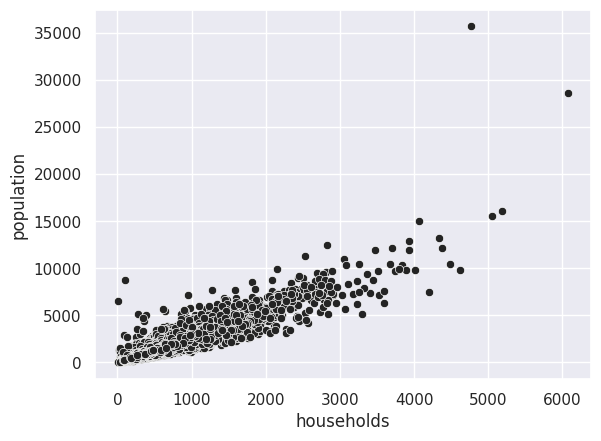

In [2]:
sb.set(style='darkgrid', context='notebook', palette='gray')

sb.scatterplot(x="households",
					y="population",
					data=df)


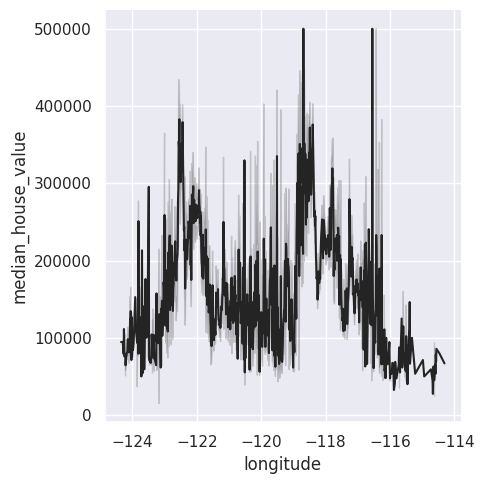

In [3]:
sb.relplot(x='longitude', y='median_house_value', kind='line', data=df)

<Axes: xlabel='housing_median_age', ylabel='Count'>

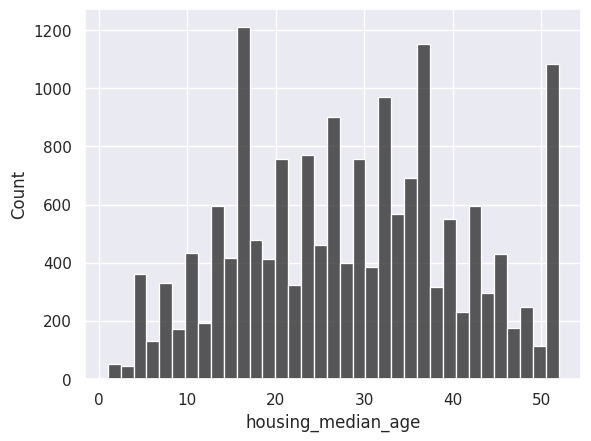

In [4]:
sb.histplot(data=df, x='housing_median_age')

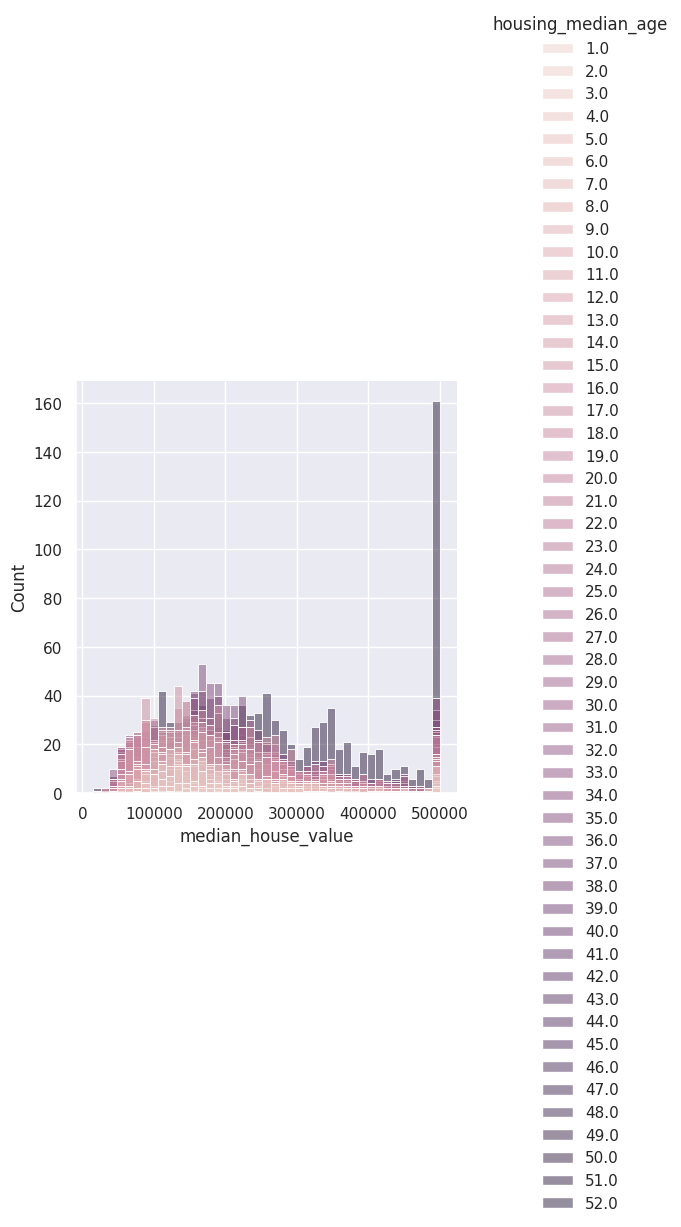

In [5]:
sb.displot(x='median_house_value', data=df, hue='housing_median_age')

##Задача №65.
Написать EDA для датасета про пингвинов
Необходимо:
* Использовать 2-3 точечных графика
* Применить доп измерение в точечных графиках, используя аргументы hue, size, stile
* Использовать PairGrid с типом графика на ваш выбор
* Изобразить Heatmap
* Использовать 2-3 гистограммы

In [6]:
penguins = sb.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

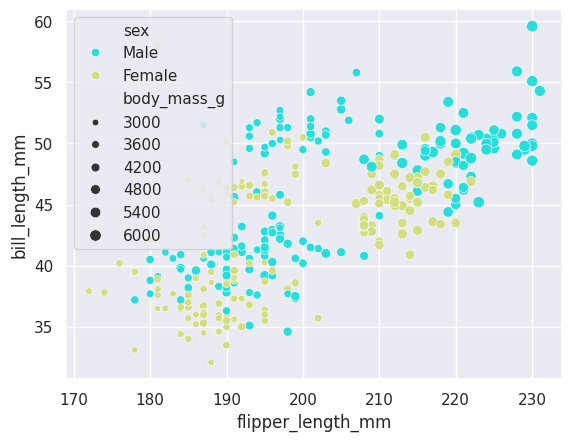

In [14]:
# sb.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, palette='rainbow', hue='sex')
# sb.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, palette='rainbow', hue='species')
# sb.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, palette='rainbow', hue='sex', size='species')
sb.scatterplot(x='flipper_length_mm', y='bill_length_mm', data=penguins, palette='rainbow', hue='sex', size='body_mass_g')

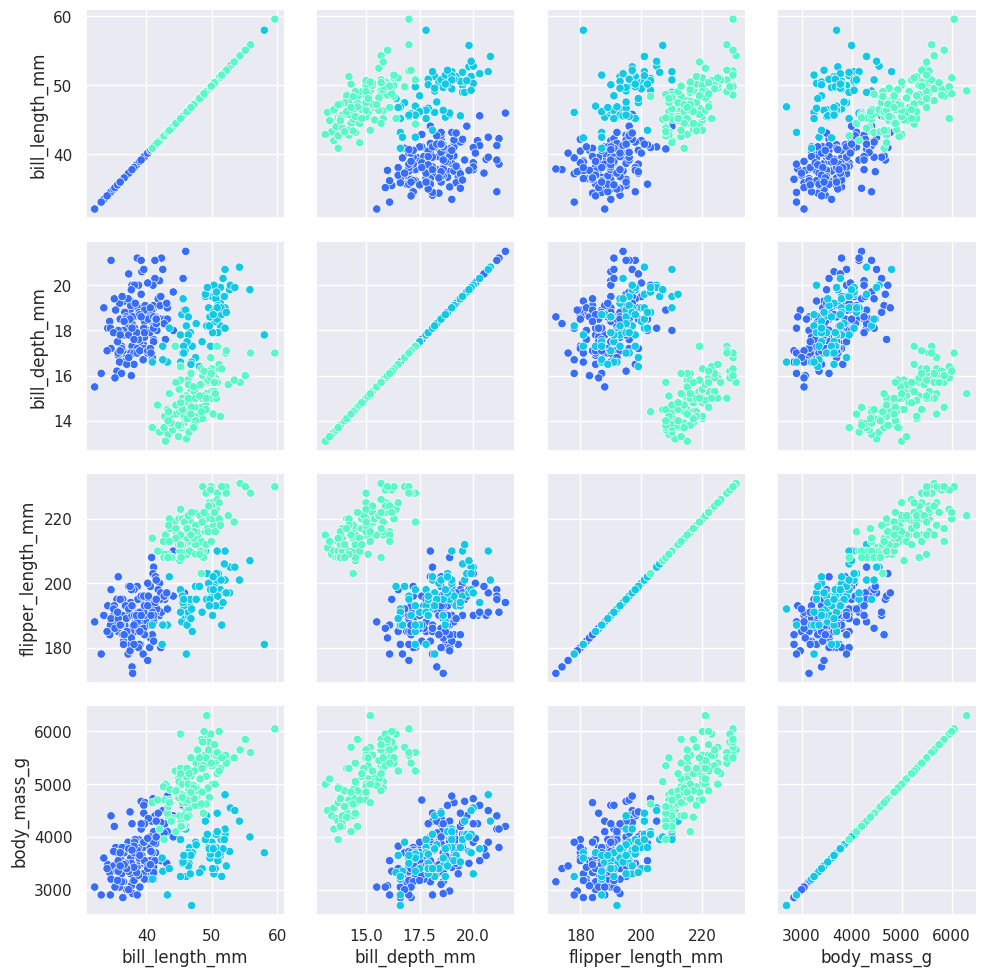

In [19]:
g = sb.PairGrid(penguins, diag_sharey=False, hue='species')
sb.set(style='darkgrid', context='notebook', palette='rainbow')
g.map(sb.scatterplot);

<Axes: xlabel='island', ylabel='Count'>

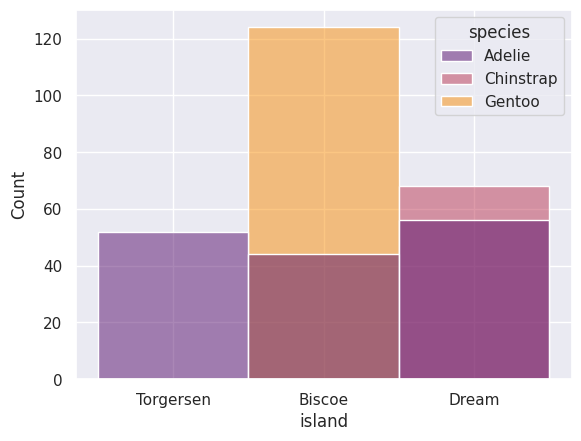

In [20]:
sb.histplot(data=penguins, x='island', hue='species', palette='inferno')

<Axes: >

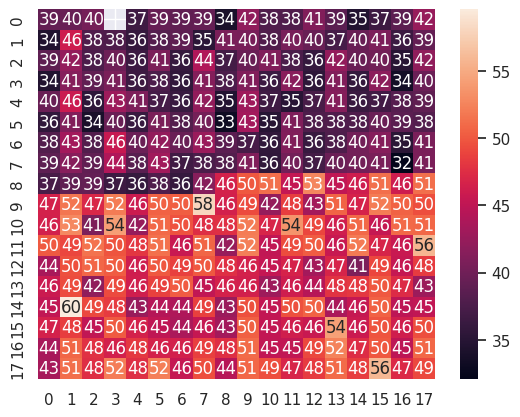

In [21]:
import numpy as np
lst1 = list(penguins['bill_length_mm'])[:324]
lst1 = np.array(lst1).reshape((18,18))
sb.heatmap(data=lst1, annot=True)

##Задача №67.
1. Создать новый столбец в таблице с пингвинами, который будет отвечать за показатель длины клюва пингвина.
* high - длинный(от 42)
* middle - средний(от 35 до 42)
* low - маленький(до 35)

<Axes: xlabel='height_group', ylabel='Count'>

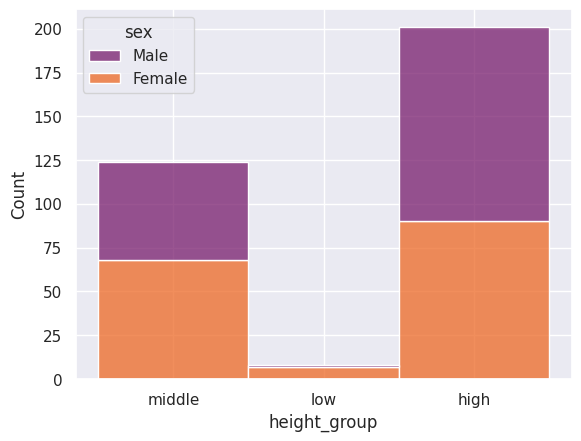

In [24]:
penguins.loc[penguins['bill_length_mm'] >= 42, 'height_group'] = 'high'
penguins.loc[(penguins['bill_length_mm'] >= 35) & (penguins['bill_length_mm'] < 42), 'height_group'] = 'middle'
penguins.loc[penguins['bill_length_mm'] < 35, 'height_group'] = 'low'

sb.histplot(data=penguins, x='height_group', hue='sex', palette='inferno', multiple='stack')

<Axes: xlabel='bill_length_mm', ylabel='Count'>

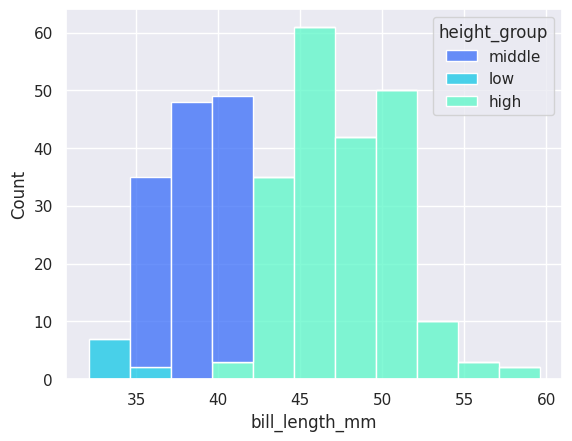

In [26]:
sb.histplot(data=penguins, x='bill_length_mm', hue='height_group', multiple='stack')